# Proyecto: Análisis de Mamografías y Predicción de Cáncer de Mama


## 1. Introducción
El cáncer de mama es una de las principales causas de muerte entre mujeres en todo el mundo. La detección temprana y el diagnóstico preciso son cruciales para mejorar las tasas de supervivencia.
Este proyecto se centra en el análisis de mamografías para identificar patrones que puedan ayudar a distinguir entre tumores benignos y malignos. Utilizaremos técnicas de análisis estadístico, modelos predictivos y reducción de dimensionalidad para lograr este objetivo.


## 2. Objetivo
Analizar parámetros derivados de mamografías para distinguir entre tumores benignos y malignos.

### Metodología

1. **Análisis Exploratorio de Datos (EDA)**: Visualización y análisis de la distribución de características, correlaciones y patrones en los datos.
2. **Preprocesamiento de Datos**: Limpieza y transformación de los datos para prepararlos para el modelado, incluyendo la normalización y la reducción de dimensionalidad.
3. **Modelado Predictivo**: Implementación de modelos de machine learning para clasificar tumores como benignos o malignos.
4. **Evaluación de Modelos**: Uso de métricas de rendimiento para evaluar la efectividad de los modelos y realizar ajustes según sea necesario.


## 3. Dataset y Carga

El dataset puede ser descargado mediante la siguiente celda de código:

In [90]:
!wget https://raw.githubusercontent.com/iHealthInstitute/Talleres_Diplomado_iHealth/refs/heads/main/data/Mamography_data.csv

--2025-07-30 13:24:44--  https://raw.githubusercontent.com/iHealthInstitute/Talleres_Diplomado_iHealth/refs/heads/main/data/Mamography_data.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.108.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 127043 (124K) [text/plain]
Grabando a: «Mamography_data.csv.1»

Mamography_data.csv 100%[===================>] 124.07K  --.-KB/s    en 0.01s   

2025-07-30 13:24:44 (9.48 MB/s) - «Mamography_data.csv.1» guardado [127043/127043]



## 4. Enunciado

Se busca predecir si un tumor es benigno o maligno a partir de los parámetros derivados de mamografías. El dataset contiene varias características numéricas que describen las propiedades de los tumores, así como una etiqueta que indica si el tumor es benigno o maligno.

En particular, hay 6 variables de interés y una variable objetivo:
- `label`: Variable objetivo (Benign o Malignant).
- Variables predictoras a analizar:
  - `mean texture`
  - `mean radius`
  - `mean fractal dimension`
  - `mean smoothness`
  - `mean compactness`
  - `mean concavity`

---
### Parte 1: Análisis Exploratorio y Estadística Inferencial

1. Carga el dataset y revisa sus dimensiones y tipos de variables. Asegurate de solo trabajar con las 6 variables mencionadas y la variable `diagnosis`.
2. Genera un `pairplot` (o matriz de gráficos) de las variables seleccionadas usando la librería `seaborn`. Usa `diagnosis` como variable de color (`hue`).
3. Verifica la distribución de cada una de las 6 variables por separado (en cada grupo):
   - Aplica el test de normalidad de Shapiro-Wilk por separado en los grupos Benigno y Maligno.
   - ¿Distribuyen normalmente? ¿En qué grupo? ¿En qué variables?
4. Aplica pruebas estadísticas para comparar los grupos:
   - Si se cumple normalidad: Aplica un t-test independiente.
   - Si **no** se cumple normalidad: Aplica una prueba de Mann-Whitney U.
5. Para cada variable, responde:
   - ¿Cuál grupo tiene mayor valor promedio?
   - ¿Es significativa la diferencia?




In [91]:
# <CODE> Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

Dimensiones del dataset: (569, 7)
Tipos de variables:
mean texture              float64
mean radius               float64
mean fractal dimension    float64
mean smoothness           float64
mean compactness          float64
mean concavity            float64
Label                      object
dtype: object


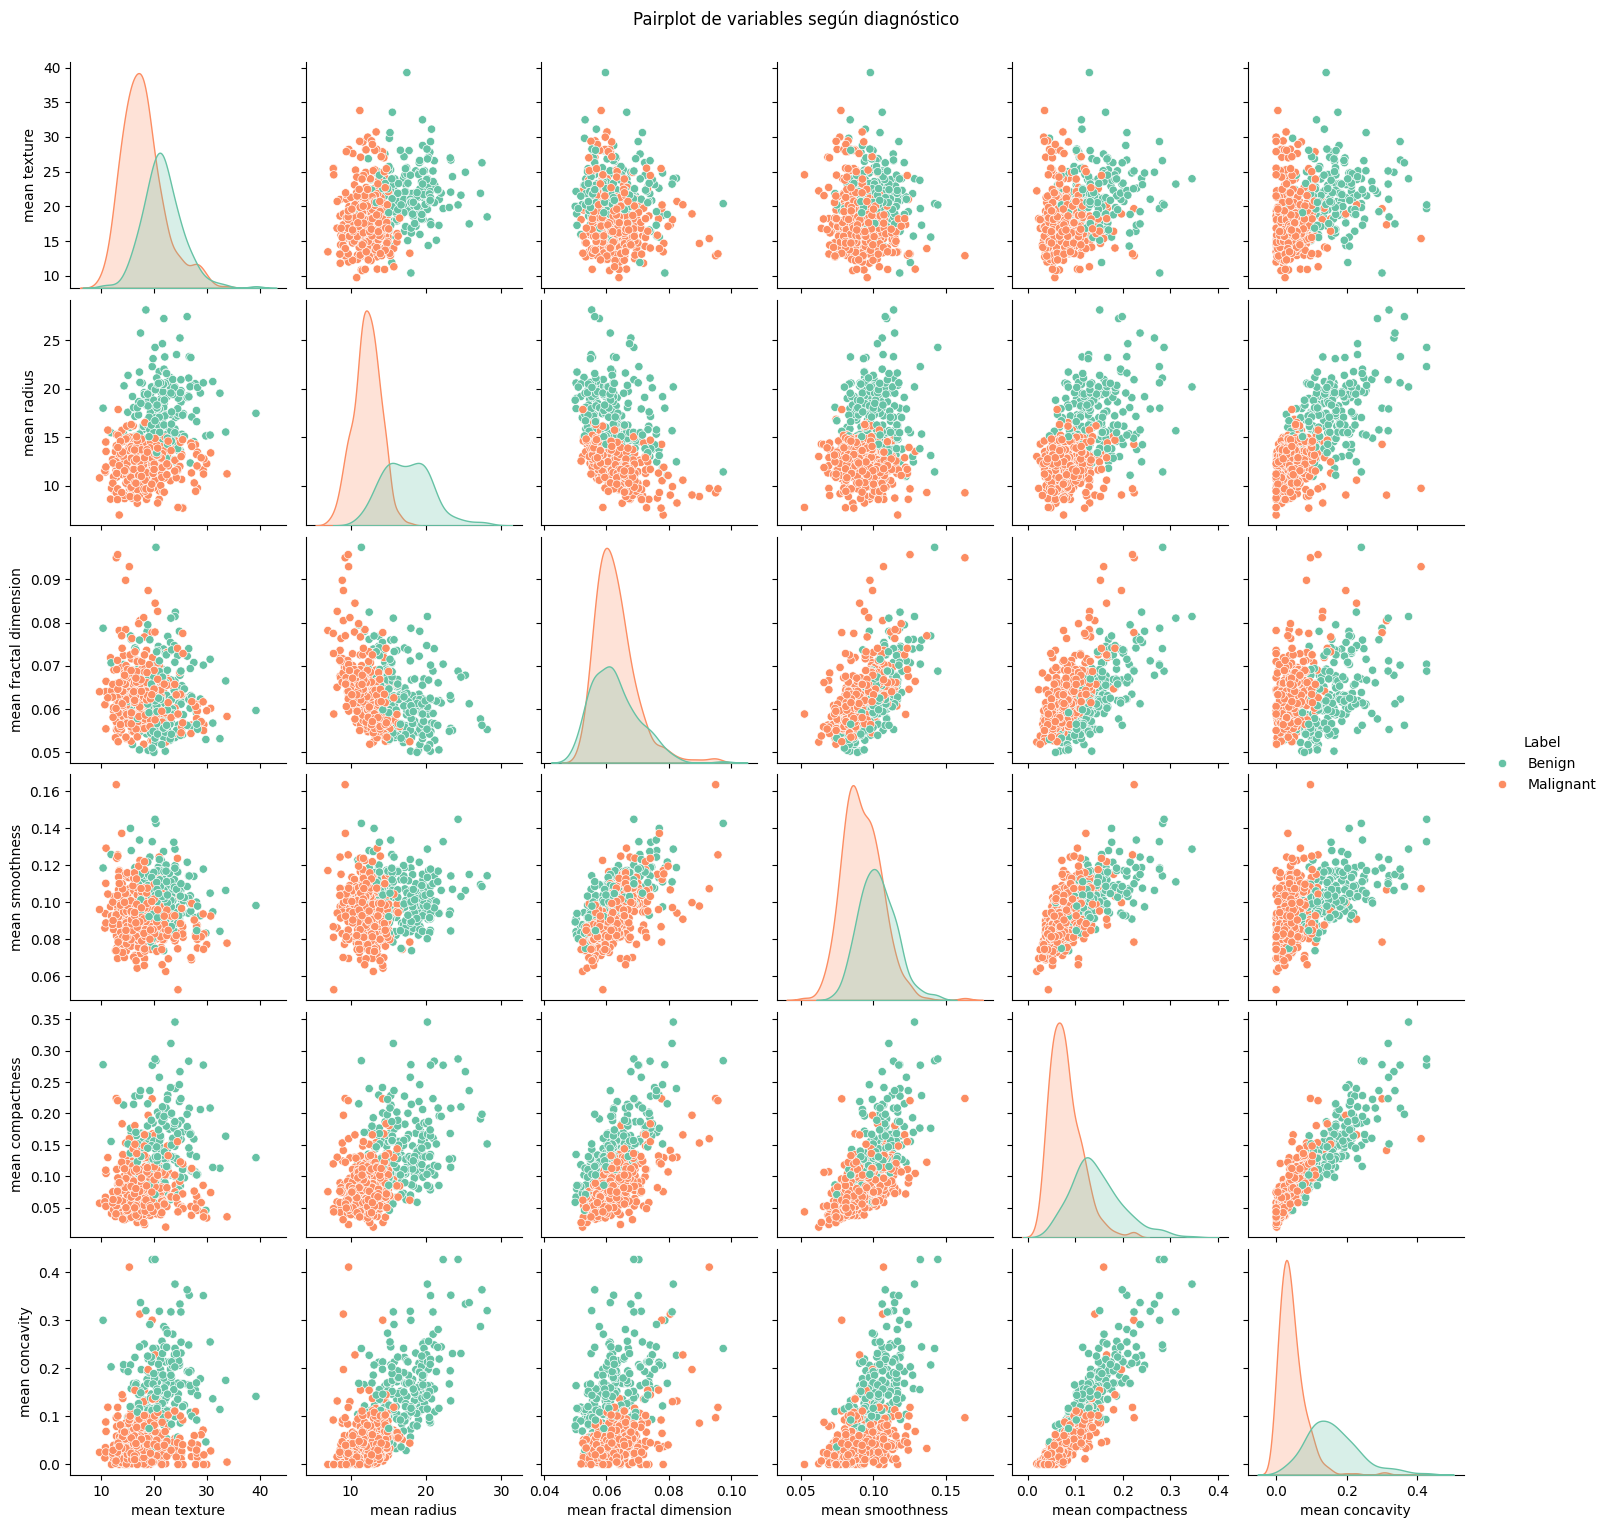

### Resultados Test de Shapiro-Wilk ###
mean texture:
  Benigno -> p = 0.0001 (No normal)
  Maligno -> p = 0.0000 (No normal)
mean radius:
  Benigno -> p = 0.0019 (No normal)
  Maligno -> p = 0.6680 (Normal)
mean fractal dimension:
  Benigno -> p = 0.0000 (No normal)
  Maligno -> p = 0.0000 (No normal)
mean smoothness:
  Benigno -> p = 0.0215 (No normal)
  Maligno -> p = 0.0000 (No normal)
mean compactness:
  Benigno -> p = 0.0000 (No normal)
  Maligno -> p = 0.0000 (No normal)
mean concavity:
  Benigno -> p = 0.0000 (No normal)
  Maligno -> p = 0.0000 (No normal)

### Comparación entre grupos (t-test o Mann-Whitney U) ###
mean texture:
  Promedio Benigno: 21.60 | Promedio Maligno: 17.91 --> Mayor en: Benigno
  Mann-Whitney U p-value = 0.0000 -> Diferencia significativa
mean radius:
  Promedio Benigno: 17.46 | Promedio Maligno: 12.15 --> Mayor en: Benigno
  Mann-Whitney U p-value = 0.0000 -> Diferencia significativa
mean fractal dimension:
  Promedio Benigno: 0.06 | Promedio Maligno: 0

In [92]:
# <CODE> Parte 1: Análisis Exploratorio y Estadística Inferencial
# 1.  Cargar datos y revisar estructura
df = pd.read_csv('Mamography_data.csv')

# Solo dejamos las variables relevantes
df = df[['mean texture', 'mean radius', 'mean fractal dimension',
         'mean smoothness', 'mean compactness', 'mean concavity', 'Label']]

# Drop filas con valores nulos
df = df.dropna()

print("Dimensiones del dataset:", df.shape)
print("Tipos de variables:")
print(df.dtypes)

#  2: Visualización con pairplot>
sns.pairplot(df, hue='Label', palette='Set2')
plt.suptitle("Pairplot de variables según diagnóstico", y=1.02)
plt.show()

#  3: Verificación de normalidad con Shapiro-Wilk
variables = ['mean texture', 'mean radius', 'mean fractal dimension',
             'mean smoothness', 'mean compactness', 'mean concavity']

# Dividimos por grupos
grupo_benigno = df[df['Label'] == 'Benign']
grupo_maligno = df[df['Label'] == 'Malignant']

print("### Resultados Test de Shapiro-Wilk ###")
for var in variables:
    stat_b, p_b = shapiro(grupo_benigno[var])
    stat_m, p_m = shapiro(grupo_maligno[var])
    print(f"{var}:")
    print(f"  Benigno -> p = {p_b:.4f} {'(Normal)' if p_b > 0.05 else '(No normal)'}")
    print(f"  Maligno -> p = {p_m:.4f} {'(Normal)' if p_m > 0.05 else '(No normal)'}")

#  4: Comparación entre grupos según normalidad
print("\n### Comparación entre grupos (t-test o Mann-Whitney U) ###")
for var in variables:
    _, p_b = shapiro(grupo_benigno[var])
    _, p_m = shapiro(grupo_maligno[var])
    
    if p_b > 0.05 and p_m > 0.05:
        # t-test
        stat, p = ttest_ind(grupo_benigno[var], grupo_maligno[var])
        test = "t-test"
    else:
        # Mann-Whitney U
        stat, p = mannwhitneyu(grupo_benigno[var], grupo_maligno[var])
        test = "Mann-Whitney U"

    mean_b = grupo_benigno[var].mean()
    mean_m = grupo_maligno[var].mean()
    grupo_mayor = "Maligno" if mean_m > mean_b else "Benigno"

    print(f"{var}:")
    print(f"  Promedio Benigno: {mean_b:.2f} | Promedio Maligno: {mean_m:.2f} --> Mayor en: {grupo_mayor}")
    print(f"  {test} p-value = {p:.4f} {'-> Diferencia significativa' if p < 0.05 else '-> No significativa'}")



---

### Parte 2: Modelamiento Predictivo

1. Codifica la variable `diagnosis` como 0 = Benigno y 1 = Maligno.
2. Usa las siguientes variables como predictores:
   - `mean texture`
   - `mean radius`
   - `mean fractal dimension`
   - `mean smoothness`
   - `mean compactness`
   - `mean concavity`
3. Normaliza las variables predictoras usando `StandardScaler`.
4. Ajusta un modelo de regresión logística con `statsmodels` y analiza el resumen.
5. Interpreta:
   - ¿Cuáles variables tienen mayor efecto sobre la probabilidad de malignidad?
   - Calcula e interpreta los **odds ratios** (`np.exp()`).
6. Usa el modelo para predecir la probabilidad de malignidad de tres nuevos pacientes:

| Paciente | mean texture | mean radius | mean fractal dimension | mean smoothness | mean compactness | mean concavity |
|----------|--------------|-------------|------------------------|------------------|------------------|----------------|
| A        | 17.0         | 14.0        | 0.055                  | 0.095            | 0.120            | 0.300          |
| B        | 23.0         | 18.0        | 0.285                  | 0.110            | 0.180            | 0.410          |
| C        | 12.0         | 10.0        | 0.040                  | 0.080            | 0.070            | 0.100          |

7. Preguntas:
   - ¿Qué paciente tiene mayor probabilidad de tener un tumor maligno?
   - ¿Cuál clasificarías como benigno con mayor seguridad?
   - ¿Cuál caso parece ambiguo?

> **Nota**: Para clasificar, puedes aplicar un umbral simple: si la probabilidad es mayor a 0.5, se predice como maligno; si es menor o igual a 0.5, se predice como benigno.


In [93]:
# <CODE> Librerías
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import numpy as np


In [94]:
# <CODE> Parte 2.
# 1. Cargar los datos y codificar variable objetivo
df = pd.read_csv("Mamography_data.csv")
print(df['Label'].value_counts())

df['Label'] = df['Label'].map({'Benign': 0, 'Malignant': 1})  # 0: Benigno, 1: Maligno

# 2. Seleccionar variables predictoras
features = ['mean texture', 'mean radius', 'mean fractal dimension',
            'mean smoothness', 'mean compactness', 'mean concavity']

X = df[features]
y = df['Label']

# 3. Normalizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos a DataFrame para trabajar con statsmodels
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# 4. Ajustar modelo de regresión logística con statsmodels
X_scaled_df = sm.add_constant(X_scaled_df)  # Agregar intercepto
model = sm.Logit(y, X_scaled_df)
result = model.fit()

# 5. Mostrar resumen del modelo
print(result.summary())

# 6. Calcular e interpretar odds ratios
odds_ratios = np.exp(result.params)
print("\nOdds Ratios:")
print(odds_ratios)

# ================================================================
# 7. Predecir nuevos pacientes

# Nuevos pacientes (datos crudos)
new_data = pd.DataFrame({
    'mean texture': [17.0, 23.0, 12.0],
    'mean radius': [14.0, 18.0, 10.0],
    'mean fractal dimension': [0.055, 0.285, 0.040],
    'mean smoothness': [0.095, 0.110, 0.080],
    'mean compactness': [0.120, 0.180, 0.070],
    'mean concavity': [0.300, 0.410, 0.100]
}, index=['Paciente A', 'Paciente B', 'Paciente C'])

# Normalizar con el mismo scaler
new_data_scaled = scaler.transform(new_data)

# Agregar constante para predicción
new_data_scaled = sm.add_constant(pd.DataFrame(new_data_scaled, columns=features))

# Predicción de probabilidad
predictions = result.predict(new_data_scaled)

# Mostrar resultados
for i, prob in enumerate(predictions):
    paciente = new_data.index[i]
    print(f"{paciente}: probabilidad de malignidad = {prob:.3f} -> {'Maligno' if prob > 0.5 else 'Benigno'}")


Label
Malignant    357
Benign       212
Name: count, dtype: int64
Optimization terminated successfully.
         Current function value: 0.139310
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Label   No. Observations:                  569
Model:                          Logit   Df Residuals:                      562
Method:                           MLE   Df Model:                            6
Date:                Wed, 30 Jul 2025   Pseudo R-squ.:                  0.7890
Time:                        13:24:47   Log-Likelihood:                -79.267
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                7.908e-125
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

---

### 🧮 Parte 3: Análisis de Componentes Principales (PCA)

1. Aplica PCA y normalize utilizando todas las variables predictoras del dataset (no solo las 6 seleccionadas).
2. Reduce la dimensionalidad a 5 y grafica los dos primeros componentes principales.
   - Usa la variable `diagnosis` para colorear los puntos.
   - Grafica la varianza explicada por cada componente.
3. Observa:
   - ¿Los grupos se separan en el espacio de componentes principales?
   - ¿Cuánta varianza explican los primeros 2 componentes?
   - ¿Qué variables tienen mayor peso en cada componente?
4. ¿Podrías usar PCA como paso previo a la regresión? ¿Por qué sí o no?

In [95]:
# <CODE> Librerías
from sklearn.decomposition import PCA


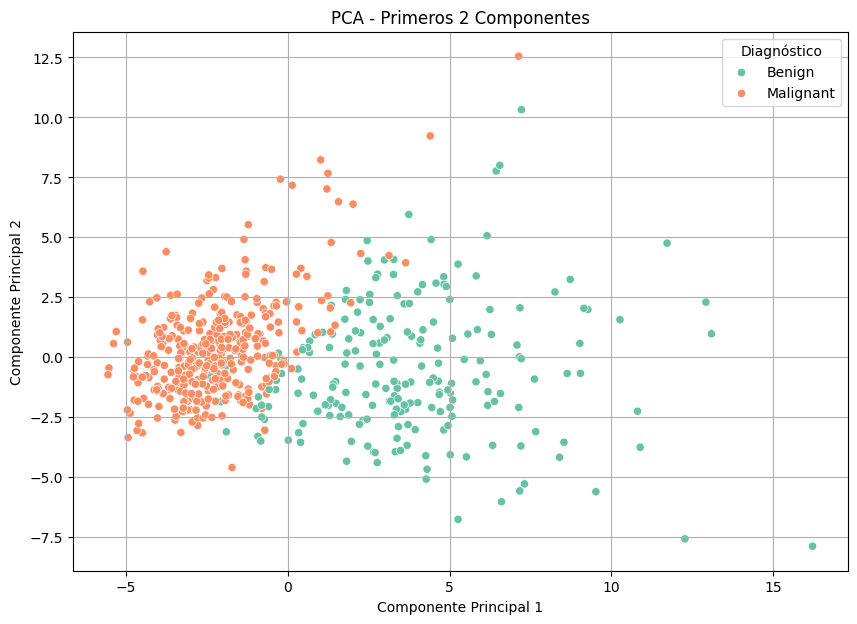

Varianza explicada por los 2 primeros componentes: 0.43 + 0.18 = 0.61


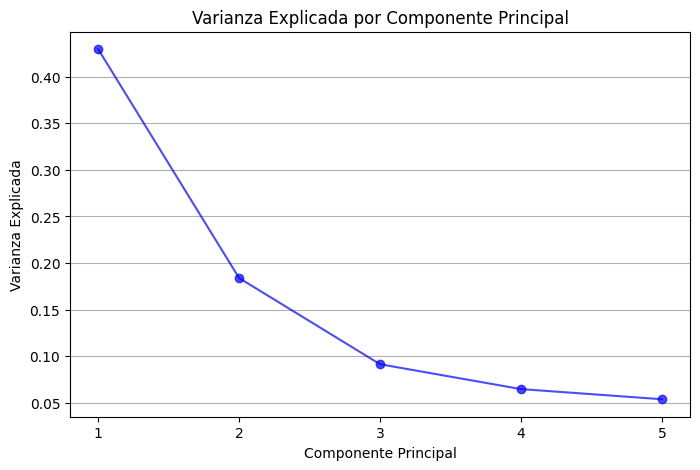

In [96]:
# <CODE> Parte 3
# 1. Cargar el dataset completo (todas las variables predictoras)
df = pd.read_csv('Mamography_data.csv')

# Seleccionar todas las variables numéricas excepto 'Label'
X = df.drop(columns=['Label'])
y = df['Label']

# 2. Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# 3. Graficar los dos primeros componentes principales
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Primeros 2 Componentes')
plt.legend(title='Diagnóstico')
plt.grid(True)
plt.show()

# Analizar la varianza explicada por cada componente
var_explicada = pca.explained_variance_ratio_
print(f"Varianza explicada por los 2 primeros componentes: {var_explicada[0]:.2f} + {var_explicada[1]:.2f} = {(var_explicada[0] + var_explicada[1]):.2f}")
# Graficar la varianza explicada
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), var_explicada, alpha=0.7, color='blue', marker='o')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.xticks(range(1, 6))
plt.grid(axis='y')
plt.show()



